In [7]:
from pylab import *
G=6.67428*10**-11
C='same'

#Formula used to ensure estimations in the next cell are correct. Also used for analyzing error percentages
#and comparing how more terms affect accuracy. Only works without initial velocities. Actual calculations in the next cell.
#The last cell contains computational speed plots, accuracy plots, etc...

Mass1, Mass2=eval(input('Enter mass for both objects in kilograms (m1, m2): '))
R=eval(input('Enter distance between both masses in meters: '))
if Mass2==C: #Used to repeat same value for each particle instead of retyping
    Mass2=Mass1

print('')

t=(pi*R**(3/2))/(2*sqrt(2*G*(Mass1+Mass2)))
#print(t)
P='The collision occurs after '
if t <= 60:
    print(P+ str(t) + ' seconds')
elif 3600 > t > 60:
    print(P+str(t // 60) + " minutes and " + str(t % 60) + " seconds")
elif 86400 > t > 3599:
    print(P+str(t // 3600) + " hours, " + str((t % 3600) // 60) + " minutes, and " + str((t % 3600) % 60) + " seconds")
elif t > 86399:
    print(P+str(t // 86400) + " days, " + str((t % 86400) // 3600) + " hours, " + str(((t % 86400) % 3600) // 60) + " minutes, and " + str(((t % 86400) % 3600) % 60) + " seconds")


Enter mass for both objects in kilograms (m1, m2): 10,10
Enter distance between both masses in meters: 1

The collision occurs after 8.0 hours, 26.0 minutes, and 40.9860599179774 seconds


Enter desired dimensions (1,2,3): 2
Enter mass for both particles in kilograms (m1, m2): 100,10000
Enter starting point for mass 1 (x,y): 0,0
Enter starting point for mass 2 (x,y): 1,1
Enter initial velocity vector [m/s] for mass 1 ⟨vx,vy⟩: .001,.001
Enter initial velocity vector [m/s] for mass 2 ⟨vx,vy⟩: 0,0

The collision occurs after 0.0 days, 0.0 hours, 12.0 minutes, and 53.287732877328835 seconds
Computational Speed: 0.03989 seconds


<IPython.core.display.Javascript object>


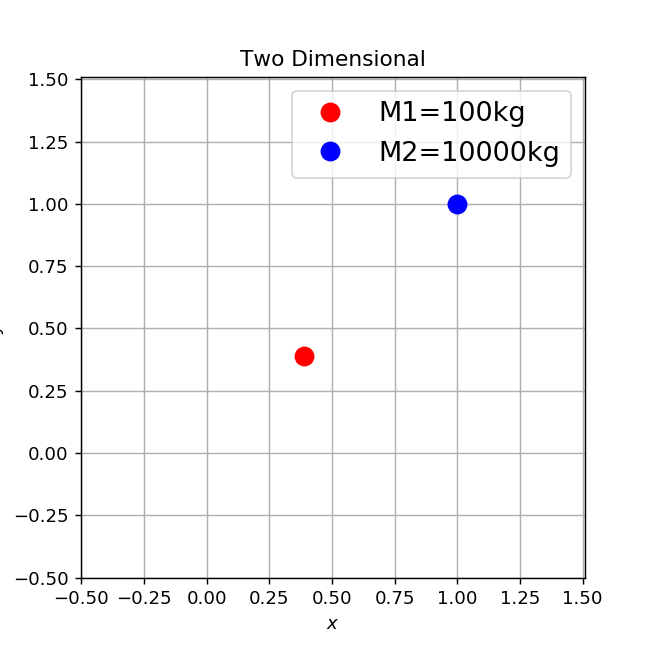

In [2]:
from pylab import *
from matplotlib.animation import *
from mpl_toolkits.mplot3d import Axes3D
from time import time

#The first time starting the code may result in an error message, however after the first attempt it works

Vescape=False
G=6.67428*10**-11
DIM=eval(input('Enter desired dimensions (1,2,3): '))


if DIM==1:
    inc=100000
    
    M1, M2= eval(input('Enter mass for both objects in kilograms (m1, m2): '))
    D= eval(input('Enter distance between both masses in meters: '))
    vel1, vel2 = eval(input('Enter initial velocities for both particles (v1, v2): '))
    
    print('')

# vel1 > 0: away from center (positive)
# vel1 < 0 : towards center (negative)

# vel2 > 0: towards center (positive)
# vel 2 < 0: away from center (negative)


    if M1==M2 and (vel1 > 0 and vel2 < 0): #conservation of momentum/adding velocities
        vT1 = vel1 + abs(vel2)
        if vT1 >= sqrt((2*G*M2)/(D)):
            print('Both masses have an escape velocity/time exceeds 5 days')
            Vescape=True

    if vel1 > 0 and vel2==0:
        if vel1 >= sqrt((2*G*M2)/(D)):
            print('Mass 1 has an escape velocity')
            Vescape=True

    if vel2 < 0 and vel1==0:
        if vel2 <= -sqrt((2*G*M1)/(D)):
            print('Mass 2 has an escape velocity')
            Vescape=True
            
    time_start = time()

    y=np.zeros(inc)
    y[0]=D
    y2=np.zeros(inc)
    v=np.zeros(inc)
    v[0]=vel1
    v2=np.zeros(inc)
    v2[0]=vel2

    if Vescape==False:
        for i in range(len(v)-1):
            time_mass=linspace(0,86400*5,inc)
            dt = time_mass[1]-time_mass[0]
            if y[i]-y2[i] < 0:
                print("The collision occurs after " + str(i*dt // 86400) + " days, " + str((i*dt % 86400) // 3600) + " hours, " + str(((i*dt % 86400) % 3600) // 60) + " minutes, and " + str(((i*dt % 86400) % 3600) % 60) + " seconds")
                cap=i+1
                break
            else:
                y[i+1] = y[i]+v[i]*dt
                y2[i+1] = y2[i] +v2[i]*dt
                v[i+1] = v[i]+((-G*M2)/((y[i]-y2[i])**2))*dt
                v2[i+1] = v2[i]+((G*M1)/((y[i]-y2[i])**2))*dt

            if y[inc-1]-y2[inc-1] > 0:
                print('Time taken exceeds 5 days')

    time_final = time()            
    print('Computational Speed: ' + str(round(time_final-time_start,5)) + ' seconds')
    
    dM1=y[0:cap]
    dM2=y2[0:cap]

    if Vescape==False:

        def mass_init():     # initialize blank frames
            pm1.set_data([],[])
            pm2.set_data([],[])
            return pm1, pm1

        def mass_frame(i): # frame number i
            pm1.set_data(dM1[i], .5)
            pm2.set_data(dM2[i], .5)
            return pm1, pm2

        %matplotlib notebook

        # set up figure frame:
        fig1 = figure(figsize=(5,5))
        ax = fig1.add_subplot(111,xlim=(min(dM2)-.05,max(dM1)+.05), ylim=(0,1))
        pm1, = ax.plot([],[],'or',markersize=10,label='M1='+ str(M1) + 'kg')
        pm2, = ax.plot([],[],'ob',markersize=10, label='M2='+ str(M2) + 'kg')
        xlabel('$x$')
        ylabel('$y$')
        title('One Dimensional')
        legend(loc='best' ,fontsize=20)
        grid('on')


        ani = FuncAnimation(fig1, mass_frame, init_func=mass_init, frames=len(dM1), interval=1)
        show()
        
elif DIM==2:
    inc=100000
    
    M1, M2= eval(input('Enter mass for both particles in kilograms (m1, m2): '))
    x1_2, y1_2= eval(input('Enter starting point for mass 1 (x,y): '))
    x2_2, y2_2= eval(input('Enter starting point for mass 2 (x,y): '))
    vx1_2,vy1_2= eval(input('Enter initial velocity vector [m/s] for mass 1 ⟨vx,vy⟩: '))
    vx2_2, vy2_2= eval(input('Enter initial velocity vector [m/s] for mass 2 ⟨vx,vy⟩: '))
    
    time_start = time()
    print('')
    
    x1=np.zeros(inc)
    y1=np.zeros(inc)
    x1[0]=x1_2
    y1[0]=y1_2
    
    x2=np.zeros(inc)
    y2=np.zeros(inc)
    x2[0]=x2_2
    y2[0]=y2_2
    
    v1x=np.zeros(inc)
    v1y=np.zeros(inc)
    v1x[0]=vx1_2
    v1y[0]=vy1_2
    
    v2x=np.zeros(inc)
    v2y=np.zeros(inc)
    v2x[0]=vx2_2
    v2y[0]=vy2_2
    
    r12x=np.zeros(inc)
    r12y=np.zeros(inc)
    angle12=np.zeros(inc)
    r12x[0] = x2[0]-x1[0]
    r12y[0] = y2[0]-y1[0]
    angle12[0]=arctan2(r12y[0],r12x[0])
    
    r21x=np.zeros(inc)
    r21y=np.zeros(inc)
    angle21=np.zeros(inc)
    r21x[0] = x1[0]-x2[0]
    r21y[0] = y1[0]-y2[0]
    angle21[0]=arctan2(r21y[0],r21x[0])
    
    r_2=np.zeros(inc)
    r_2[0]=sqrt(((y2[0]-y1[0])**2)+((x2[0]-x1[0])**2))
    
    Collision=False
    
    
    if Vescape==False:
        for j in range(len(v1x)-1):
            time_mass=linspace(0,86400*5,inc)
            dt = time_mass[1]-time_mass[0]
            if r_2[j] < 2*(10**-2): #acts as radii of both point masses
                print("The collision occurs after " + str(j*dt // 86400) + " days, " + str((j*dt % 86400) // 3600) + " hours, " + str(((j*dt % 86400) % 3600) // 60) + " minutes, and " + str(((j*dt % 86400) % 3600) % 60) + " seconds")
                cap=j+1
                Collision=True
                break
            else:
                r_2[j+1]=sqrt(((y2[j]-y1[j])**2)+((x2[j]-x1[j])**2))
                
                r12x[j+1] = x2[j]-x1[j]
                r12y[j+1] = y2[j]-y1[j]
                angle12[j+1]=arctan2(r12y[j],r12x[j])
                x1[j+1]= x1[j]+v1x[j]*dt
                y1[j+1]= y1[j]+v1y[j]*dt
                v1x[j+1] = v1x[j]+((((G*M2)/((r_2[j]**2))))*cos(angle12[j]))*dt 
                v1y[j+1] = v1y[j]+((((G*M2)/((r_2[j]**2))))*sin(angle12[j]))*dt
                
                
                r21x[j+1] = x1[j]-x2[j]
                r21y[j+1] = y1[j]-y2[j]
                angle21[j+1]=arctan2(r21y[j],r21x[j])
                x2[j+1]= x2[j]+v2x[j]*dt
                y2[j+1]= y2[j]+v2y[j]*dt
                v2x[j+1] = v2x[j]+((((G*M1)/((r_2[j]**2))))*cos(angle21[j]))*dt
                v2y[j+1] = v2y[j]+((((G*M1)/((r_2[j]**2))))*sin(angle21[j]))*dt

            if r_2[inc-1] > 0:
                cap=inc+1
                print('Time taken exceeds 5 days')
                print('The minimum distance between the masses is ' + str(min(r_2)) + ' meters')
                
    time_final = time()            
    print('Computational Speed: ' + str(round(time_final-time_start,5)) + ' seconds')
           
    dM1y=y1[0:cap]
    dM2y=y2[0:cap]
    dM1x=x1[0:cap]
    dM2x=x2[0:cap]
    
    if Collision==True:
        if min(dM1y) < min(dM2y):
            MINPLOTy=min(dM1y)
        else:
            MINPLOTy=min(dM2y)

        if max(dM1y) > max(dM2y):
            MAXPLOTy=max(dM1y)
        else:
            MAXPLOTy=max(dM2y)

        if min(dM1x) < min(dM2x):
            MINPLOTx=min(dM1x)
        else:
            MINPLOTx=min(dM2x)

        if max(dM1x) > max(dM2x):
            MAXPLOTx=max(dM1x)
        else:
            MAXPLOTx=max(dM2x)
            
    if Collision==False:
        MINPLOTx, MAXPLOTx= eval(input('Enter minimum and maximum X values on the plot (min,max): '))
        MINPLOTy, MAXPLOTy= eval(input('Enter minimum and maximum Y values on the plot (min,max): '))
        
        
    if Vescape==False:

        def mass_init():     # initialize blank frames
            pm1.set_data([],[])
            pm2.set_data([],[])
            return pm1, pm2

        def mass_frame(i): # frame number i
            pm1.set_data(dM1x[i],dM1y[i] )
            pm2.set_data(dM2x[i],dM2y[i] )
            return pm1, pm2

        %matplotlib notebook

        # set up figure frame:
        fig1 = figure(figsize=(5,5))
        ax = fig1.add_subplot(111,xlim=(MINPLOTx-.5,MAXPLOTx+.5),ylim=(MINPLOTy-.5,MAXPLOTy+.5))
        pm1, = ax.plot([],[],'or',markersize=10,label='M1='+ str(M1) + 'kg')
        pm2, = ax.plot([],[],'ob',markersize=10, label='M2='+ str(M2) + 'kg')
        xlabel('$x$')
        ylabel('$y$')
        title('Two Dimensional')
        legend(loc='best' ,fontsize=15)
        grid('on')


        ani = FuncAnimation(fig1, mass_frame, init_func=mass_init, frames=len(dM1x), interval=1)
        show()

elif DIM==3:
    inc=100000
    
    M1, M2= eval(input('Enter mass for both particles in kilograms (m1, m2): '))
    x1_3, y1_3, z1_3 = eval(input('Enter starting point for mass 1 (x,y,z): '))
    x2_3, y2_3, z2_3 = eval(input('Enter starting point for mass 2 (x,y,z): '))
    vel1_3 = eval(input('Enter initial velocity [m/s] for mass 1 (+ is away, - is towards): '))
    vel2_3 = eval(input('Enter initial velocity [m/s] for mass 2 (+ is towards, - is away): '))
    
# vel1 > 0: away from center (positive)
# vel1 < 0 : towards center (negative)

# vel2 > 0: towards center (positive)
# vel 2 < 0: away from center (negative)
    
    xyz1=np.zeros(inc)
    xyz1[0]=sqrt(((y2_3-y1_3)**2)+((x2_3-x1_3)**2)+((z2_3-z1_3)**2))
    xyz2=np.zeros(inc)
    
    #To simplify the problem, mass 1 is placed away at the calculated distance while mass 2 stays at the origin
    
    if M1==M2 and (vel1_3 > 0 and vel2_3 < 0): #conservation of momentum/adding velocities
        vT1 = vel1_3 + abs(vel2_3)
        if vT1 >= sqrt((2*G*M2)/(xyz1[0])):
            print('Both masses have an escape velocity/time exceeds 5 days')
            Vescape=True

    if vel1_3 > 0 and vel2_3==0:
        if vel1_3 >= sqrt((2*G*M2)/(xyz1[0])):
            print('Mass 1 has an escape velocity')
            Vescape=True

    if vel2_3 < 0 and vel1_3==0:
        if vel2_3 <= -sqrt((2*G*M1)/(xyz1[0])):
            print('Mass 2 has an escape velocity')
            Vescape=True
    
    time_start = time()
    
    xyzV1=np.zeros(inc)
    xyzV2=np.zeros(inc)
    xyzV1[0]=vel1_3
    xyzV2[0]=vel2_3

    
    if Vescape==False:
        for k in range(inc-1):
            time_mass=linspace(0,86400*5,inc)
            dt = time_mass[1]-time_mass[0]
            if xyz1[k]-xyz2[k] < 0:
                print("The collision occurs after " + str(k*dt // 86400) + " days, " + str((k*dt % 86400) // 3600) + " hours, " + str(((k*dt % 86400) % 3600) // 60) + " minutes, and " + str(((k*dt % 86400) % 3600) % 60) + " seconds")
                cap=k+1
                break
            else:
                xyz1[k+1] = xyz1[k]+xyzV1[k]*dt
                xyz2[k+1] = xyz2[k] +xyzV2[k]*dt
                xyzV1[k+1] = xyzV1[k]+((-G*M2)/((xyz1[k]-xyz2[k])**2))*dt
                xyzV2[k+1] = xyzV2[k]+((G*M1)/((xyz1[k]-xyz2[k])**2))*dt

            if xyz1[inc-1]-xyz2[inc-1] > 0:
                print('Time taken exceeds 5 days')
                
    time_final = time()            
    print('Computational Speed: ' + str(round(time_final-time_start,5)) + ' seconds')
    
    
    if Vescape==False:
        fig1 = figure(figsize=(8,8));
        rcParams.update({'font.size': 18})
        title('Position VS. Time', fontsize=25)
        xlabel('$Time$ (h)', fontsize=25)
        ylabel('$Position$ (m)', fontsize=25)
        plot(time_mass/3600,xyz1-xyz2,':',color='magenta',label='Distance Between Masses',lw=2)
        xlim(0,k*dt/3600)
        plot(time_mass/3600,xyz1,'--',label='M1='+ str(M1) + ' kg',lw=2)
        plot(time_mass/3600,xyz2,'--',label='M2=' + str(M2) + ' kg',lw=2)
        legend(loc='best' ,fontsize=15)
        grid('on')

        
        #velocity/acceleration below
        
        '''fig2 = figure(figsize=(8,8));
        rcParams.update({'font.size': 18})
        title('Velocity VS. Time', fontsize=25)
        xlabel('$Time$ (h)', fontsize=25)
        ylabel('$Velocity$ (m/s)', fontsize=25)
        xlim(0,k*dt/3600)
        plot(time_mass/3600,xyzV1,'--',label='M1='+ str(M1) + ' kg',lw=2)
        plot(time_mass/3600,xyzV2,'--',label='M2=' + str(M2) + ' kg',lw=2)
        legend(loc='best' ,fontsize=15)
        grid('on')
        
        fig3 = figure(figsize=(8,8));
        rcParams.update({'font.size': 18})
        title('Acceleration VS. Time', fontsize=25)
        xlabel('$Time$ (h)', fontsize=25)
        ylabel('$Acceleration$ (m/s²)', fontsize=25)
        xlim(0,k*dt/3600)
        plot(time_mass/3600,((-G*M2)/((xyz1-xyz2)**2))*dt,'--',label='M1='+ str(M1) + ' kg',lw=2)
        plot(time_mass/3600,((G*M1)/((xyz1-xyz2)**2))*dt,'--',label='M2=' + str(M2) + ' kg',lw=2)
        legend(loc='best' ,fontsize=15)'''
        
#Velocity and acceleration plots usually look flat and have RuntimeWarning: divide by zero encountered in true_divide

else:
    print('Invalid Dimension')

#For accuracy and computational speed with respect to the number of iterations/terms in the loop, check the next cell 
    

<IPython.core.display.Javascript object>


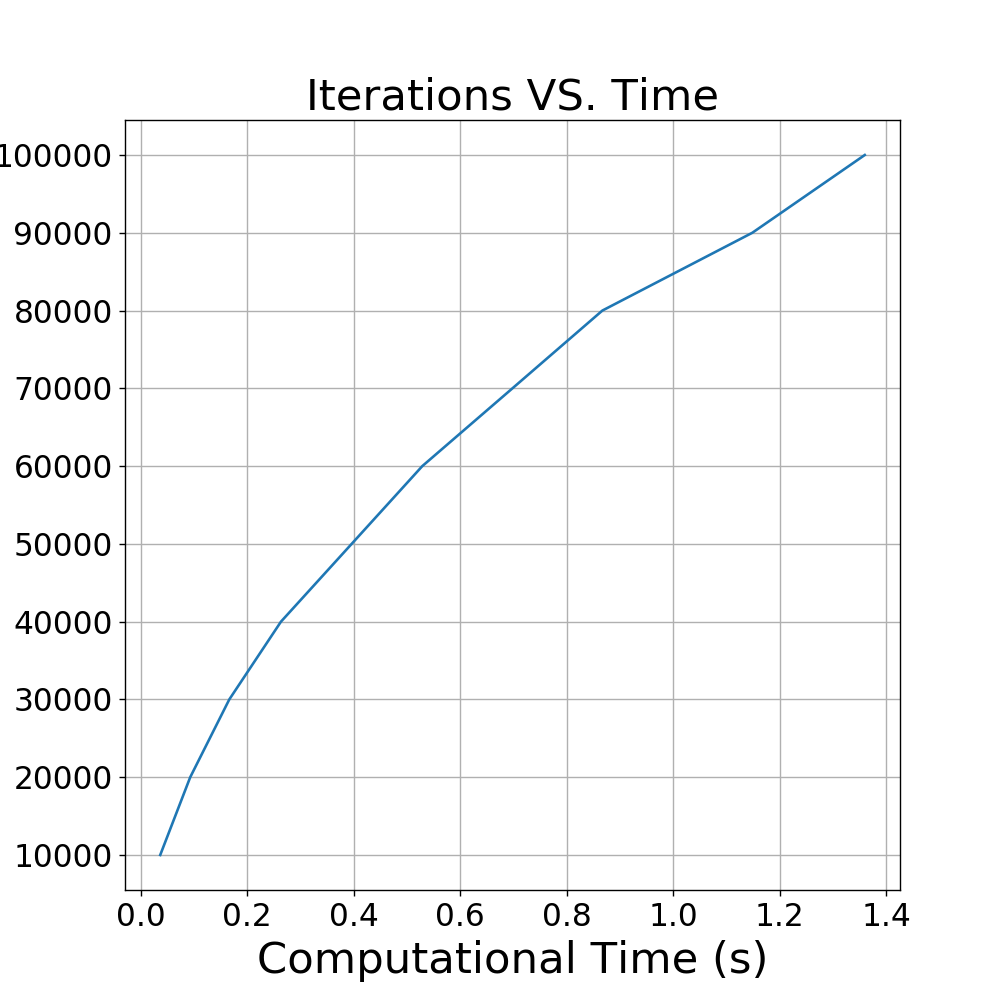

<IPython.core.display.Javascript object>


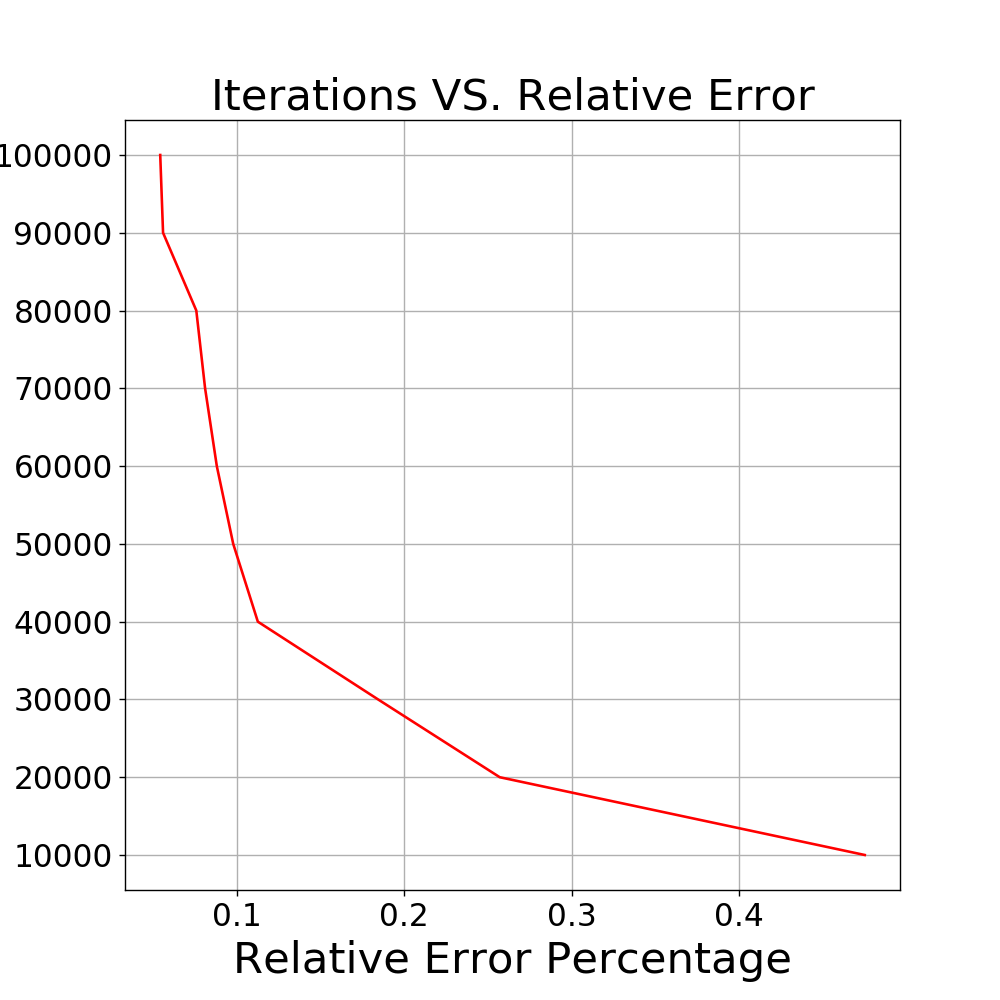

In [144]:
from pylab import *
#The following is for a 1 dimensional situation with both masses equal to 10kg at 1 meter apart without initial velocities:

number_of_iterations=linspace(10000,100000,10)
comp_time=[0.03645,0.09277,0.16615,0.26318,0.39595,0.52861,0.69791,0.86681,1.14836, 1.35957] #seconds
time_approx=array([30545.454545454544,30479.12395619781,30457.015233841128,30435.160879021976,30430.688613772276,30427.70712845214,30425.577508250117,30423.980299753744,30417.937977088633,30417.424174241743])
#Calculated/True value is 30400.986059917977 seconds
relative_error=abs((time_approx-30400.986059917977)/30400.986059917977)

fig1 = figure(figsize=(8,8));
rcParams.update({'font.size': 18})
yticks(np.arange(10000, 100001, step=10000))
title('Iterations VS. Time', fontsize=25)
xlabel('Computational Time (s)', fontsize=25)
ylabel('Number of Terms', fontsize=25)
plot(comp_time,number_of_iterations)
grid('on')

fig2 = figure(figsize=(8,8));
rcParams.update({'font.size': 18})
yticks(np.arange(10000, 100001, step=10000))
title('Iterations VS. Relative Error', fontsize=25)
xlabel('Relative Error Percentage', fontsize=25)
ylabel('Number of Terms', fontsize=25)
plot(relative_error*100,number_of_iterations,color='red')
grid('on')


#These plots also imply that longer computational times result in more accurate approximations
